# 0. Importing libraries

In [1]:
import pandas as pd
import pymongo

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nps

import warnings
warnings.filterwarnings("ignore")

# 1. Loading data

## 1.1. Getting data from MongoDB database and transforming to pandas dataframe

In [2]:
connection = pymongo.MongoClient('localhost', 27017)
db = connection["db_scraping_extra"]
collection_products = db["products"]
collection_reviews = db["reviews"]

In [3]:
df_products =  pd.DataFrame(list(collection_products.find()))
df_reviews =  pd.DataFrame(list(collection_reviews.find()))

## 1.2. Cleaning dataframes and organizing columns

- Products dataframe:

In [4]:
df_products['product_type'] = df_products['categories'].apply(lambda x: x['parents']['name'])
df_products['feature'] = df_products['categories'].apply(lambda x: x['parents']['parents']['name'])
df_products['category'] = df_products['categories'].apply(lambda x: x['name'])
df_products['brand'] = df_products['brand'].apply(lambda x: x['name'])
df_products.drop(columns=['_id', 'id', 'sku', 'categories', 'url'], inplace=True, axis=1)

- Reviews dataframe:

In [5]:
df_reviews.drop(columns=['_id', 'id', 'product_id', 'product_sku'], inplace=True, axis=1)

# 2. Descriptive data analysis

## 2.1. Products analysis

### - Data's 'face':

In [6]:
df_products.head()

,title,brand,product_type,feature,category
0,Refrigerador Consul Facilite CRB36AB Frost Fre...,Consul,Refrigeradores,1 Porta,Eletrodomésticos
1,Refrigerador Consul CRD37EB com Prateleiras Re...,Consul,Refrigeradores,2 Portas,Eletrodomésticos
2,Refrigerador Consul CRM43NB Frost Free Branco ...,Consul,Refrigeradores,2 Portas,Eletrodomésticos
3,Refrigerador Electrolux Degelo Prático RE31 co...,Electrolux,Refrigeradores,1 Porta,Eletrodomésticos
4,Refrigerador Electrolux Duplex DC35A 260L - Br...,Electrolux,Refrigeradores,2 Portas,Eletrodomésticos


### - Data size:

In [7]:
df_products.shape

(5635, 5)

### - Data columns:

In [8]:
df_products.columns

Index(['title', 'brand', 'product_type', 'feature', 'category'], dtype='object')

### - Basic information:

In [9]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5635 non-null   object
 1   brand         5635 non-null   object
 2   product_type  5635 non-null   object
 3   feature       5565 non-null   object
 4   category      5635 non-null   object
dtypes: object(5)
memory usage: 220.2+ KB


### - Data description:

In [10]:
df_products.describe()

,title,brand,product_type,feature,category
count,5635,5635,5635,5565,5635
unique,5285,292,3,14,3
top,Cilindro Premium DR2340 DR2370 Dcp-2540 L2520,Não Informado,Televisores,Smart TV,TV e Vídeo
freq,12,417,2530,2240,2530


### - Checking missing values:

In [11]:
df_products.isna().sum()

title            0
brand            0
product_type     0
feature         70
category         0
dtype: int64

### - All brand frequency (top 30):

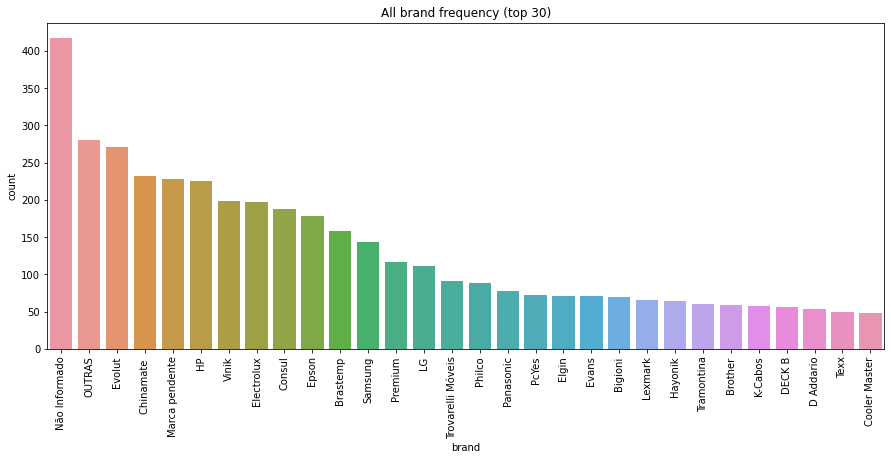

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot('brand', data=df_products, order=df_products['brand'].value_counts()[:30].index)
plt.xticks(rotation=90)
plt.title('All brand frequency (top 30)');

### - Coolers brand frequency (top 30):

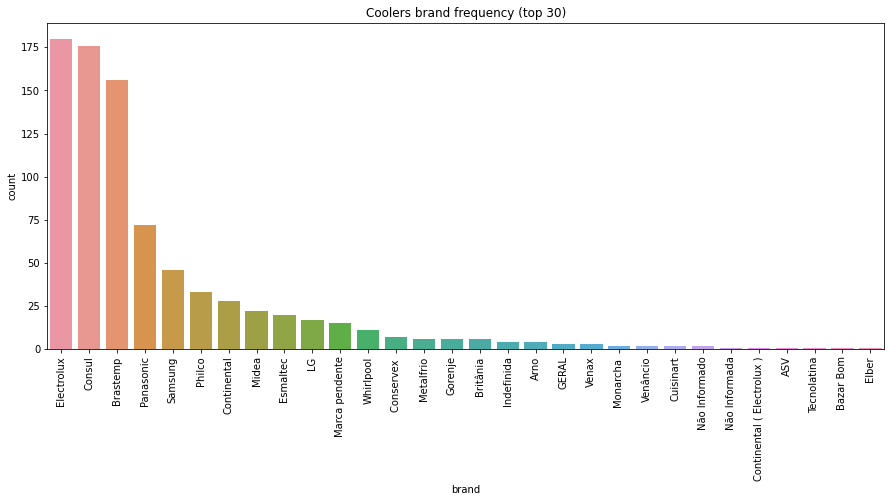

In [13]:
plt.figure(figsize=(15, 6))
sns.countplot('brand',
              data=df_products[df_products['product_type'] == 'Refrigeradores'],
              order=df_products[df_products['product_type'] == 'Refrigeradores']['brand'].value_counts()[:30].index)
plt.xticks(rotation=90)
plt.title('Coolers brand frequency (top 30)');

### - Televisions brand frequency (top 30):

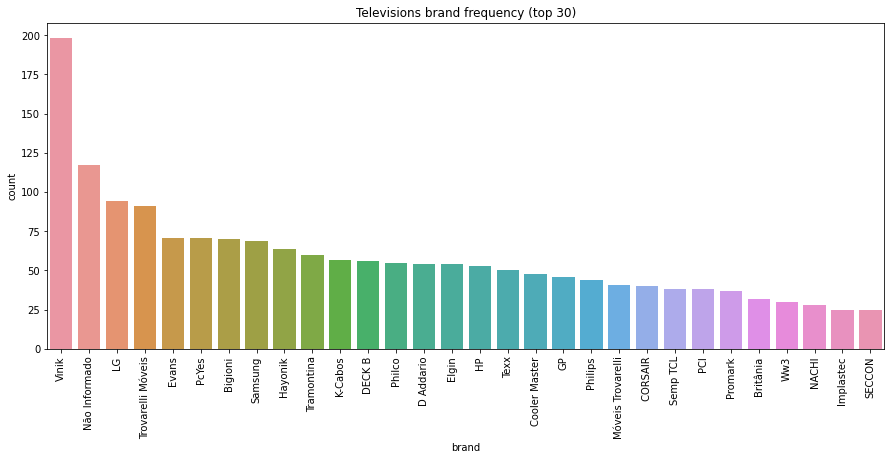

In [14]:
plt.figure(figsize=(15, 6))
sns.countplot('brand',
              data=df_products[df_products['product_type'] == 'Televisores'],
              order=df_products[df_products['product_type'] == 'Televisores']['brand'].value_counts()[:30].index)
plt.xticks(rotation=90)
plt.title('Televisions brand frequency (top 30)');

### - Printers brand frequency (top 30):

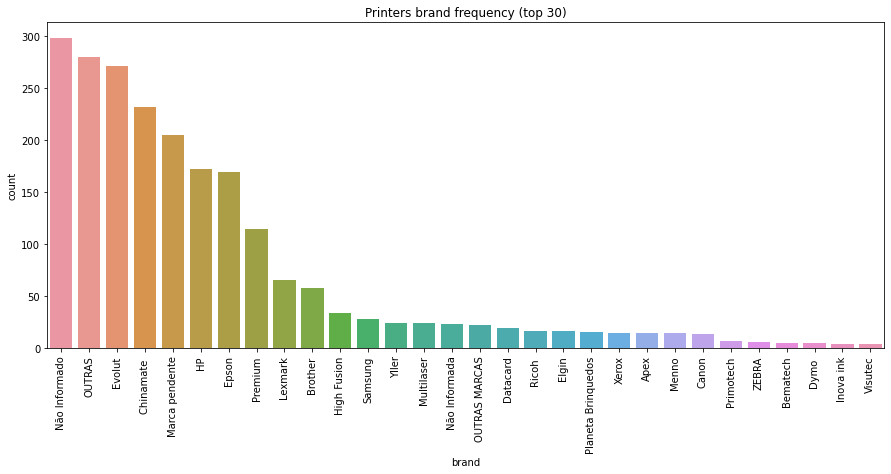

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot('brand',
              data=df_products[df_products['product_type'] == 'Impressoras'],
              order=df_products[df_products['product_type'] == 'Impressoras']['brand'].value_counts()[:30].index)
plt.xticks(rotation=90)
plt.title('Printers brand frequency (top 30)');

### - Title frequency:

In [13]:
df_products['title'].value_counts(ascending=False)

Geladeira Consul CRM56HK Frost Free 450L                                                                    4
Cabo HDMI 5 Metros Para TV Ultra Hd HDTV 4k 2.0 Alta Velocidade Forte Reforçado LEY-08 - LEHMOX             4
Cabo HDMI 2 Metros Para TV Ultra Hd HDTV 4k 2.0 Alta Velocidade Forte Reforçado LEY-08 - LEHMOX             4
Geladeira Porta De Vidro Expositora Conservex                                                               4
Geladeira Consul CRM50HK Frost Free 410L                                                                    4
                                                                                                           ..
Geladeira / Refrigerador Frost Free Duplex Brastemp BRM56AK, 462 litros                                     1
Tela 24&quot; Hd Usb Hdmi Gravador 3 Conversor Multilaser                                                   1
Fogao 4B Atlas Tropical Glass C/ Acend - 300000421                                                          1
Refrigerad

### - Category frequency:

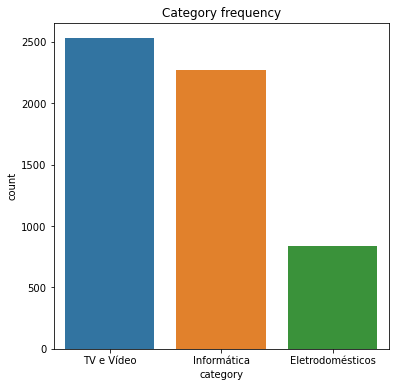

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot('category', data=df_products, order=df_products['category'].value_counts().index)
plt.title('Category frequency');

### - Product type frequency:

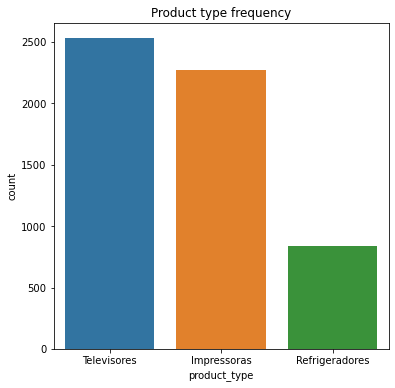

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot('product_type', data=df_products, order=df_products['product_type'].value_counts().index)
plt.title('Product type frequency');

### - Feature frequency:

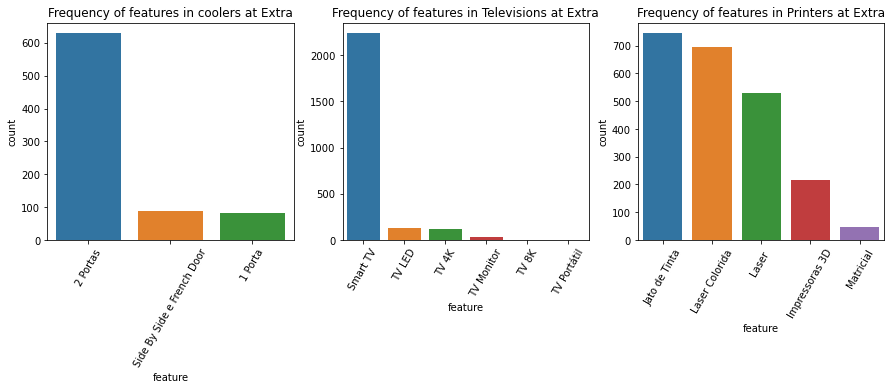

In [20]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.countplot('feature',
              data=df_products[df_products['product_type'] == 'Refrigeradores'],
              order=df_products[df_products['product_type'] == 'Refrigeradores']['feature'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Frequency of features in coolers at Extra')
plt.subplot(1, 3, 2)
sns.countplot('feature',
              data=df_products[df_products['product_type'] == 'Televisores'],
              order=df_products[df_products['product_type'] == 'Televisores']['feature'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Frequency of features in Televisions at Extra')
plt.subplot(1, 3, 3)
sns.countplot('feature',
              data=df_products[df_products['product_type'] == 'Impressoras'],
              order=df_products[df_products['product_type'] == 'Impressoras']['feature'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Frequency of features in Printers at Extra')
plt.show();

## 2.2. Reviews analysis

### - Data's 'face':

In [22]:
df_reviews.head()

,product_name,text,rating,date,dislikes,likes
0,Refrigerador Consul Facilite CRB36AB Frost Fre...,"Ótima essa aquisição, apesar de ser bem compac...",5,21/02/19,10,71
1,Refrigerador Consul Facilite CRB36AB Frost Fre...,"Não tem pros,muito Boa eu recomendo além de se...",5,19/03/21,0,3
2,Refrigerador Consul Facilite CRB36AB Frost Fre...,Gela bem porém o modelo que eu comprei CRB36AB...,3,23/03/19,3,15
3,Refrigerador Consul Facilite CRB36AB Frost Fre...,Bom produto. Veio com um pequeno defeito no fo...,5,13/03/19,2,2
4,Refrigerador Consul Facilite CRB36AB Frost Fre...,Muito bom,5,15/07/20,0,1


### - Data size:

In [23]:
df_reviews.shape

(25560, 6)

### - Data columns:

In [24]:
df_reviews.columns

Index(['product_name', 'text', 'rating', 'date', 'dislikes', 'likes'], dtype='object')

### - Data information:

In [25]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25560 entries, 0 to 25559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  25560 non-null  object
 1   text          25560 non-null  object
 2   rating        25560 non-null  int64 
 3   date          25560 non-null  object
 4   dislikes      25560 non-null  int64 
 5   likes         25560 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


### - Data basic description:

- Numerical values

In [26]:
df_reviews.describe()

,rating,dislikes,likes
count,25560.000000,25560.000000,25560.000000
mean,4.730321,0.183216,0.675822
std,0.640524,1.080887,4.564786
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000
max,5.000000,59.000000,265.000000


In [27]:
reviews_numerical = ['rating', 'dislikes', 'likes']

- Non-numerical values

In [28]:
df_reviews.describe(include=["object", "bool"])

,product_name,text,date
count,25560,25560,25560
unique,292,18962,1963
top,"Smart TV LED 32"" HD LG 32LM625BPSB ThinQ AI In...",Muito bom,07/04/21
freq,1679,560,112


In [29]:
reviews_non_numerical = ['product_name', 'text', 'date']

### - Checking missing values:

In [30]:
df_reviews.isna().sum()

product_name    0
text            0
rating          0
date            0
dislikes        0
likes           0
dtype: int64

### - Distribution of values in 'rating', 'dislikes' and 'likes':

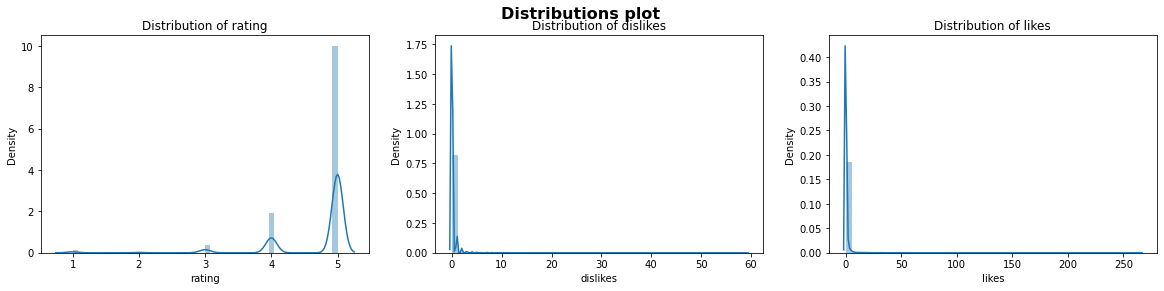

In [31]:
plt.figure(figsize=(20, 4))
tmp = 0
for column in reviews_numerical:
    tmp+=1
    plt.subplot(1, len(reviews_numerical), tmp)
    sns.distplot(df_reviews.loc[:, column])
    plt.title(f'Distribution of {column}')
plt.suptitle('Distributions plot', fontsize=16, fontweight='bold')
plt.show();

### - Pair plot comparison:

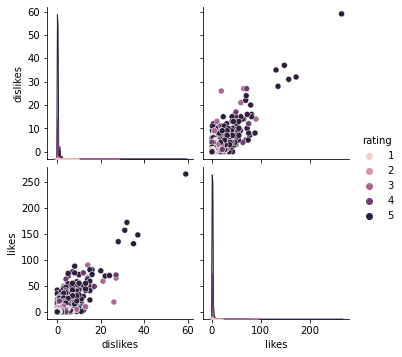

In [32]:
sns.pairplot(df_reviews, hue='rating', );

### - Person's correlation between numerical values:

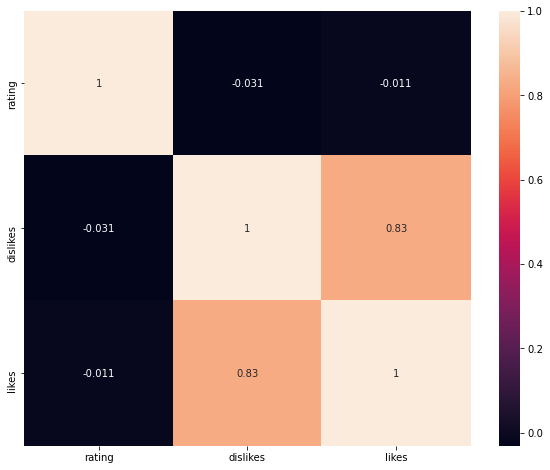

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df_reviews.corr(), annot=True);

### - Boxplot analysis:

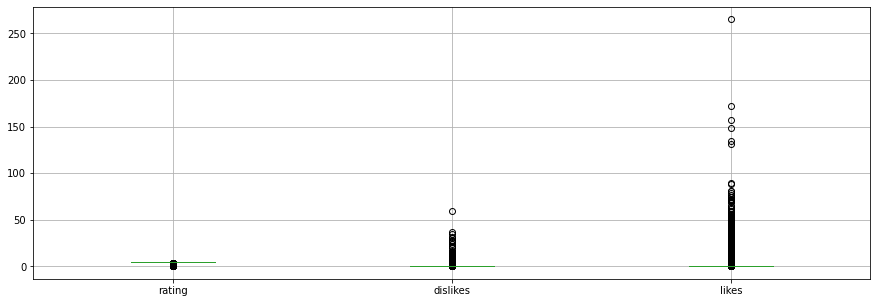

In [34]:
df_reviews.boxplot(figsize=(15,5));